# The Pyplot package

[Official Pyplot package documentation](https://matplotlib.org/stable/tutorials/introductory/pyplot.html)

***

Import all the necessary packages 

In [1]:
# For plotting
import matplotlib as mpl
import matplotlib.pyplot as plt

# For numerical manipulation
import numpy as np

## Introduction

### What is Matplotlib?

Matplotlib is a multiplatform data visualization library for Python, originally created in 2003 as a patch for IPython for enabling interactive MATLAB-style plotting from the IPython command line [2]. 

It is built on NumPy arrays and designed to work with SciPy stack [2]. Its design philosophy is that it should be possible to create simple plots with just a few commands [1] but at the same time it allows for high degree of customization of parameters of created plots (colours, markers, line style etc, to name just few).

One of its strengths is compatibility with many different operating systems and graphics backends, ensuring correct operation regardless the users platform. This has led to wide adoption of this package by the large userbase which in turn led to large active developer base and the package popularity [2].

After being in use for nearly two decades, the interface and style of Matplotlib is showing it's age. It also predates Pandas for over a decade, so it's not designed to be used with Pandas ```DataFrames```. The answer to these weaknesses of Matplotlib is a Seaborn package. It provides a high-level interface on top of Matplotlib and offers large choices for plot styles and customization and defines high-level functions for common statistical plot types [2]. However, because Seaborn is built on top of Matplotlib, full customization of its plots require some knowledge of Matplotlib's concepts and interface [3].

### How to install it?

Matplotlib package is not a part of Pythons Standard library, and therefore it must be installed before it can be used [4]. It can be installed using pip:

```pip
python -m pip install -U matplotlib
```

Matplotlib is also a part of the major Python distributions. If any of the following distributions are installed, there is no need to install Matplotlib separately as it's already included in the package [5]:
- Anaconda
- ActiveState ActivePython
- WinPython

### How to use it?

As with any other Python package that is not part of the Python Standard Library, first Matplotlib must be imported before it can be used in the application. Typically, ```plt``` is used as a shorthand for the ```matplotlib.pyplot``` interface and ```mpl``` for the ```matplotlib``` package [2][6]:

```python
import matplotlib as mpl
import matplotlib.pyplot as plt
```

The ```plt``` interface is what is used most often, although access to some of the plot parameters requires calling the  ```matplotlib``` directly.


Matplotlib is an object-oriented package and its principal objects are the Figure, the Axes and the Axis objects [6][7]:
- The Figure object is a canvas, on which all the other objects (Artists) are rendered (Axes, titles, legends etc).
- Axes are the objects attached to the Figure that contains a region for the plotting data and include 2 (or 3 for 3D plots) Axis objects
- Axis objects (e.g. X and Y axis) set the scale and limits and generate ticks (the marks on the Axis) and tick labels
- Artists are all the elements that are rendered on the figure. This can include Axes, Axis, Titles, Legend. All the items labelled blue on below Figure are Artists.


<div>
<img src='https://matplotlib.org/stable/_images/anatomy.png' width="500"/>
</div>

#### State-based interface [7][8]

For simple plots it is possible to use only the ```pyplot``` interface. In this approach, various ```pyplot``` commands can be called in sequence and each command will modify some aspect of the same Figure object, without the need of user to explicitly create and call the Figure object. The state of the Figure object is preserved after each ```pyplot``` function call, thus its name state-based interface.

An an ilustration for this approach, let's quickly plot a linear $y=x$ and a square functions $y=x^2$:

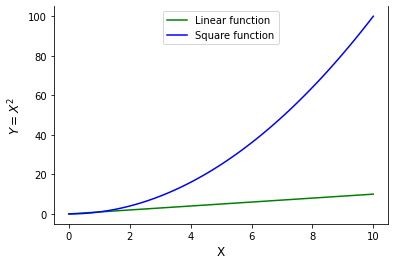

In [2]:
# initialize X and Y=X*X values
x = np.linspace(0, 10, 101) 
y1 = x
y2 = np.power(x, 2)


# plot the data
plt.plot(x, y1, 'g-')
plt.plot(x, y2, 'b-')

# Set the X axis label
plt.xlabel('X', fontsize=12)
# Set the Y axis label
plt.ylabel('$Y=X^2$', fontsize=12)

# Add the legend
plt.legend(['Linear function', 'Square function'], loc='upper center')

# Set the top Spine to invisible
# Access to objects attached to the current active instance of Axes object
# is possible using gca() method
plt.gca().spines['top'].set_visible(False)

# visualize the plot
plt.show()

As seen in the example above, the state-based approach consists of series of ```plt``` interface functions calls. Each of these functions changes some of the aspects of the current active Figure or Axes objects. If there is no active Figure object, first ```plt``` function creates its own, including the Axes object. This approach is quick and simple, suitable for a simpler plots but it can get difficult to read when used to plot more complex plots.

#### Object-oriented interface [7][8]

The Matplotlib is object oriented package. The state-based interface masks that fact to make the usage similar to MATLAB interface by putting the functional interface on the top. But in reality, what happens under the hood is that when the first ```plt``` function is called it creates hidden Figure and Axes objects. Their state is changed with each subsequent ```plt``` function call.

When working with an object-oriented interface, user explicitly creates and instances of Figure and Axes objects and callst the appropriate functions on these instances. The most common way to create the pair of these objects instances is calling the ```subplots()``` function:
```python
fig, ax = plt.subplots()
```
- fig - an instance of the Figure object
- ax - an instance of the Axes object

Let's use this approach to recreate the plot above for linear $y=x$ and a square functions $y=x^2$:

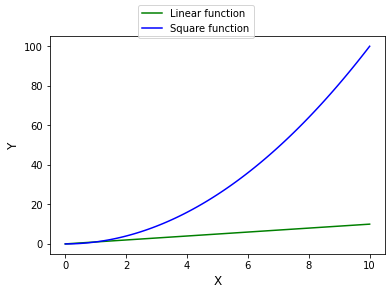

In [3]:
# initialize an instances of Figure and Axes objects
fig, ax = plt.subplots()

# Set the labels
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)

# Plot the data onto the Axes object
ax.plot(x, y1, 'g-')
ax.plot(x, y2, 'b-')

# Add the Legend Artist to the Figure object
fig.legend(['Linear function', 'Square function'], loc='upper center')

# Show the plot
plt.show()

The above example yields the same results using both approches. The main difference is, that using object-oriented interface, ```plot()``` and ```set_xlabel(), set_ylabel()``` functions are called explicitly on the instance of the Axes object and the ```legend()``` function is explicitly called on the instance of Figure object. In the state-based interface, these functions are called from the ```plt``` interface which executes these functions on the active Figure or Axes objects which are obscured from the user.

Object-oriented interface offers functionality that is not easily available through the state-based interface, for example using separate y-axis for plots of 2 different functions plotted on the same Figure:

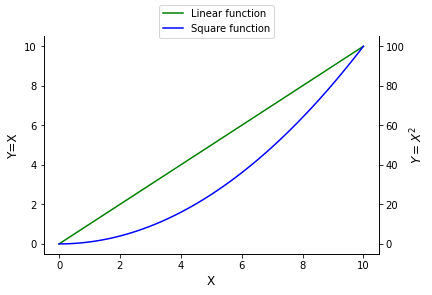

In [4]:
# initialize an instances of Figure and Axes objects
fig, ax1 = plt.subplots()

# Set the labels
ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('Y=X', fontsize=12)
# Plot the data onto the Axes object
ax1.plot(x, y1, 'g-')

# create another Axes that share the x-axis
ax2 = ax1.twinx()
ax2.set_ylabel('$Y=X^2$', fontsize=12)
ax2.plot(x, y2, 'b-')

# Add the Legend Artist to the Figure object
fig.legend( ['Linear function', 'Square function'], loc='upper center')

# Set the top Spine in both Axes to invisible
# This is much cleaner way of accessing Spine objects comparing to the 
# State-based interface method: plt.gca().spines['top'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Show the plot
plt.show()

## References

[[1] https://matplotlib.org/cheatsheets/handout-beginner.pdf](https://matplotlib.org/cheatsheets/handout-beginner.pdf )</br>
[[2] Python Data Science Handbook, Jake VanderPlas, Chapter 4. Visualization with Matplotlib, O'Reilly](https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html )</br>
[[3] An introduction to seaborn](http://seaborn.pydata.org/introduction.html)</br>
[[4] The Python Standard Library](https://docs.python.org/3/library/)</br>
[[5] Matplotlib, Installation](https://matplotlib.org/stable/users/installing/index.html)</br>
[[6] Matplotlib, Basic Usage](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)</br>
[[7] Pyplot vs Object Oriented Interface](https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/)</br>
[[8] Matplotlib and the Object-Oriented Interface](https://danielmuellerkomorowska.com/2020/07/05/matplotlib-and-the-object-oriented-interface/)</br>

# End